In [5]:
# How Developer Features Influence AI Tool Adoption

#Target variable: whether a developer uses AI tools (`AISelect_binary`).

## Project Overview
#This project uses the **2025 Stack Overflow Developer Survey** to analyze which developer characteristics are associated with AI tool adoption. Using descriptive analysis and a supervised machine learning model, we aim to understand patterns in AI usage across education, experience, and employment characteristics.

#**Target Variable:**  
# `AISelect_binary` — whether a developer uses AI tools (Yes = 1, No = 0)

#**Methodology:**  
#This project follows the **CRISP-DM (Cross-Industry Standard Process for Data Mining)** framework to structure the analysis.



In [6]:
## CRISP-DM Phase 1: Business Understanding

### Objective
#The goal of this project is to identify which developer attributes influence AI tool adoption.

### Business Questions
#1. Which developer characteristics are most associated with AI usage?
#2. Does education level impact AI adoption?
#3. Does professional experience influence AI tool usage?
#4. Can developer attributes be used to predict AI adoption?

#Understanding these patterns can help organizations, educators, and tool creators better support developers as AI becomes more integrated into software development.


In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [8]:
## CRISP-DM Phase 2: Data Understanding

#The dataset used in this project is the **2025 Stack Overflow Developer Survey**, which includes over 49,000 developer responses across 170+ variables.

### Key Characteristics
# Self-reported survey data
# Mix of numeric and categorical variables
# Many optional questions, leading to missing values

# Initial exploration focuses on understanding data structure, variable types, and completeness.


In [9]:
#Load Data

df = pd.read_csv("C:/Users/janel/Downloads/survey_results_public.csv", low_memory=False)
df.head()


,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49191 entries, 0 to 49190
Columns: 172 entries, ResponseId to JobSat
dtypes: float64(52), int64(1), object(119)
memory usage: 64.6+ MB


In [11]:
### Target Variable Definition

#The original `AISelect` column contains multiple response options describing AI usage frequency.

#To support binary classification, the target variable was transformed into:
# `1` → Developer reports using AI tools
# `0` → Developer does not report AI usage

#This simplifies interpretation and supports supervised learning.


In [12]:
df['AISelect_binary'] = df['AISelect'].apply(
    lambda x: 1 if isinstance(x, str) and x.startswith('Yes, I use AI') else 0
)

df['AISelect_binary'].value_counts(dropna=False)




1    26469
0    22722
Name: AISelect_binary, dtype: int64

In [13]:
## CRISP-DM Phase 3: Data Preparation

### Handling Missing Values

#Because the Stack Overflow survey is optional and self-reported, missing values are expected.

#### Categorical Variables
# Missing values are filled with `"Unknown"`
# This preserves data volume and allows the model to learn whether missingness itself is informative

#### Numeric Variables
# Missing values are filled with `0`
# Tree-based models such as Random Forests handle zero values robustly
# Many numeric fields represent optional responses rather than true absence

#This approach ensures consistency across descriptive and machine learning analyses.


In [14]:
drop_cols = [
    'ResponseId', 'SOAccount', 'SOVisitFreq', 'SODuration', 'SOPartFreq',
    'AISelect'  # original multi-class target
]
df_model = df.drop(columns=drop_cols)


In [15]:
# Fill categorical NaNs with 'Unknown'
categorical_cols = df_model.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    df_model[col] = df_model[col].fillna('Unknown')

# Fill numeric NaNs with 0
numeric_cols = df_model.select_dtypes(include=['int64','float64']).columns.tolist()
for col in numeric_cols:
    df_model[col] = df_model[col].fillna(0)



In [16]:
### Encoding Categorical Variables

#Categorical variables were encoded using **Label Encoding**.

#**Why Label Encoding?**
# Random Forests do not assume ordinal relationships
# One-hot encoding would significantly increase dimensionality
# Label encoders are stored to ensure consistent transformations during prediction

# This approach balances performance, interpretability, and computational efficiency.


In [17]:
#Encode Categorical Columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col])
    label_encoders[col] = le


In [18]:
### Train-Test Split

#The dataset is split into training and testing sets using **stratified sampling** to preserve class balance.


In [19]:
# Split data into train/test
X = df_model.drop('AISelect_binary', axis=1)
y = df_model['AISelect_binary']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Make explicit copies to avoid SettingWithCopyWarning
X_train = X_train.copy()
X_test = X_test.copy()

# Replace infinities with NaN
X_train.replace([np.inf, -np.inf], np.nan, inplace=True)
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

# Fill any remaining NaNs with 0
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

# Clip numeric columns to avoid extremely large values
for col in X_train.select_dtypes(include=['float64', 'int64']).columns:
    X_train[col] = X_train[col].clip(-1e9, 1e9)
    X_test[col] = X_test[col].clip(-1e9, 1e9)


In [20]:
## CRISP-DM Phase 4: Modeling

#A **Random Forest Classifier** was selected due to its ability to:
# Handle high-dimensional data
# Capture non-linear relationships
# Perform well with encoded categorical features
# Remain robust to outliers and missing-value strategies

# Class balancing was applied to address minor class imbalance.


In [21]:
#train random forest classifier
rf_model = RandomForestClassifier(
    n_estimators=200, 
    random_state=42, 
    class_weight='balanced'
)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [22]:
## CRISP-DM Phase 5: Evaluation

#Model performance is evaluated using:
# Accuracy
# Precision, Recall, and F1-score
# Confusion Matrix
# Feature importance analysis


Accuracy: 0.9424738286411221

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      4545
           1       0.93      0.97      0.95      5294

    accuracy                           0.94      9839
   macro avg       0.94      0.94      0.94      9839
weighted avg       0.94      0.94      0.94      9839



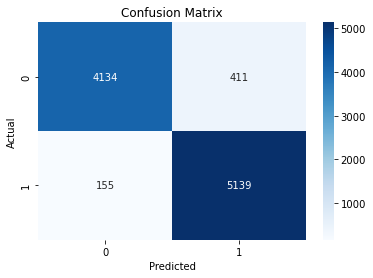

In [23]:
#evaluate model
y_pred = rf_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()



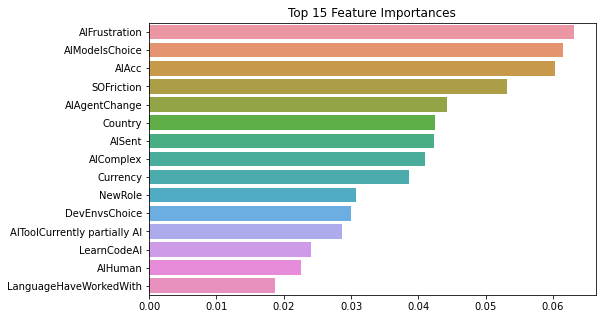

In [24]:
#feature importance
importances = pd.Series(rf_model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x=importances.values[:15], y=importances.index[:15])
plt.title("Top 15 Feature Importances")
plt.show()

In [25]:
## CRISP-DM Phase 6: Deployment and Interpretation

#To demonstrate real-world applicability, the trained model is used to predict AI adoption for a hypothetical developer profile.

#This ensures:
# Consistent preprocessing
# Safe handling of unseen categorical values
# Practical usability of the model


In [26]:
# Safe transform function
def safe_transform(le, value):
    """Transform unseen category to most common class (index 0)."""
    return le.transform([value])[0] if value in le.classes_ else 0

# Example new developer
new_dev = pd.DataFrame([{
    'Age': 28,
    'EdLevel': "Bachelor's degree",
    'Employment': 'Employed full-time',
    'WorkExp': 5,
    'YearsCode': 4,
    'DevType': 'Full-stack developer',
    'OrgSize': '50-99 employees'
}])

# Encode categorical columns
encoded_dev = {}
for col in categorical_cols:
    if col in new_dev.columns:
        encoded_dev[col] = new_dev[col].apply(lambda x: safe_transform(label_encoders[col], x))
    else:
        # Missing column -> fill with 0
        encoded_dev[col] = 0

# Convert to DataFrame
encoded_dev = pd.DataFrame(encoded_dev)

# Add numeric columns that are missing (all zeros)
numeric_cols = [col for col in X_train.columns if col not in encoded_dev.columns]
if numeric_cols:
    encoded_dev = pd.concat([encoded_dev, pd.DataFrame(0, index=encoded_dev.index, columns=numeric_cols)], axis=1)

# Reorder columns to match training data
encoded_dev = encoded_dev[X_train.columns]

# Predict
pred_prob = rf_model.predict_proba(encoded_dev)[0, 1]
pred_class = rf_model.predict(encoded_dev)[0]

print(f"Predicted probability of using AI: {pred_prob:.2f}")
print(f"Predicted class (1=Yes, 0=No): {pred_class}")


Predicted probability of using AI: 0.50
Predicted class (1=Yes, 0=No): 0


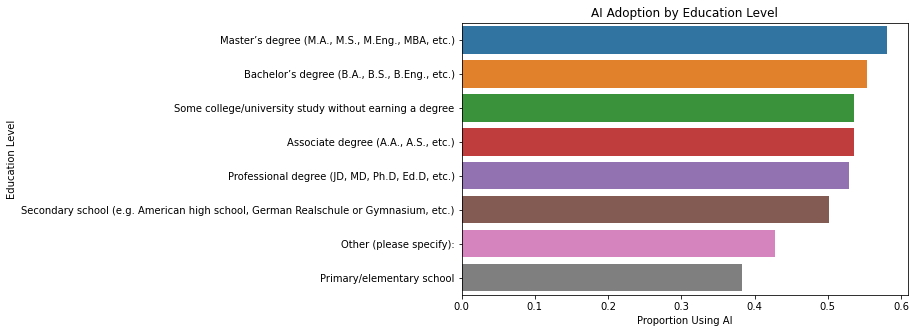

In [27]:
## Business Questions & Insights

#In addition to predicting AI adoption for a new developer, we explore other questions to understand patterns of AI adoption among developers.

#Question 1: Does Education Level affect AI tool adoption?

#Group by education level
ed_ai = df.groupby('EdLevel')['AISelect_binary'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=ed_ai.values, y=ed_ai.index)
plt.xlabel("Proportion Using AI")
plt.ylabel("Education Level")
plt.title("AI Adoption by Education Level")
plt.show()

#Insight: Developers with higher education levels tend to have higher AI adoption rates.




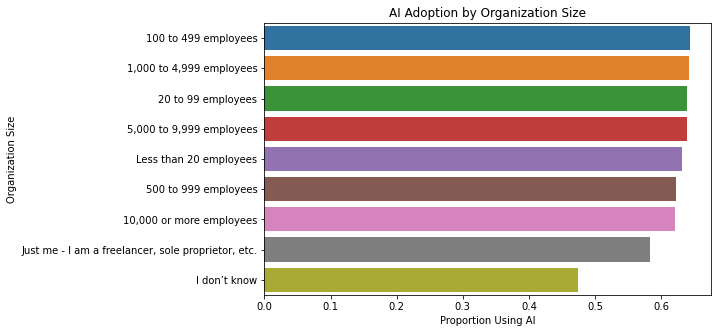

In [28]:
#Question 2: Does Organization Size affect AI adoption?
org_ai = df.groupby('OrgSize')['AISelect_binary'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=org_ai.values, y=org_ai.index)
plt.xlabel("Proportion Using AI")
plt.ylabel("Organization Size")
plt.title("AI Adoption by Organization Size")
plt.show()

#Insight: Developers in larger organizations are more likely to use AI tools regularly.



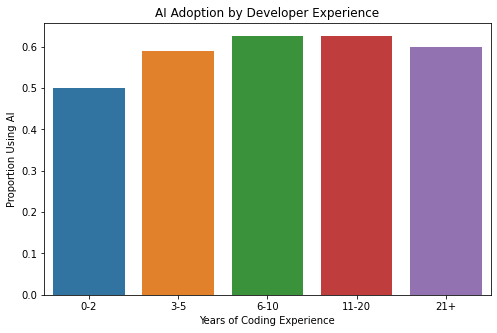

In [29]:
#Question 3: Does Developer Experience affect AI adoption?
# Categorize YearsCode into bins
df['YearsCode_bins'] = pd.cut(df['YearsCode'], bins=[0,2,5,10,20,50], labels=['0-2','3-5','6-10','11-20','21+'])

exp_ai = df.groupby('YearsCode_bins')['AISelect_binary'].mean()

plt.figure(figsize=(8,5))
sns.barplot(x=exp_ai.index, y=exp_ai.values)
plt.xlabel("Years of Coding Experience")
plt.ylabel("Proportion Using AI")
plt.title("AI Adoption by Developer Experience")
plt.show()

#Insight: AI adoption increases with coding experience, peaking in mid-career developers.

